In [1]:
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import numpy as np
import pymc as pm

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NASA-HD209458b.tbl to NASA-HD209458b.tbl


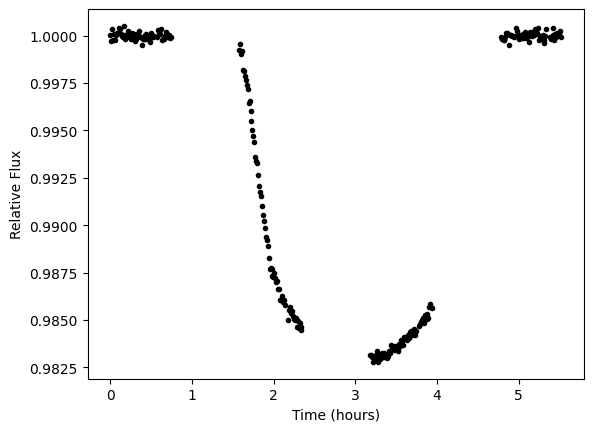

In [3]:
# import data
dat = astropy.io.ascii.read('NASA-HD209458b.tbl')

time = (dat['HJD'] - dat['HJD'][0]) * 24 * u.hour # convert time to hours
ind = np.where(time < 100 * u.hour) # filter out second transit
time = time[ind]
flux = dat['Relative_Flux']
flux = flux[ind]

plt.plot(time, flux, linestyle = '', marker = '.', color = 'black')
plt.xlabel('Time (hours)')
plt.ylabel('Relative Flux')
plt.show()

In [11]:
def box_model(time, tau, t_0, delta):
  f = np.zeros(len(time))
  ind = np.where(np.abs(time.value - t_0) < tau / 2)
  f[ind] = 1 - delta
  ind = np.where(np.abs(time.value - t_0) >= tau / 2)
  f[ind] = 1
  return(f)

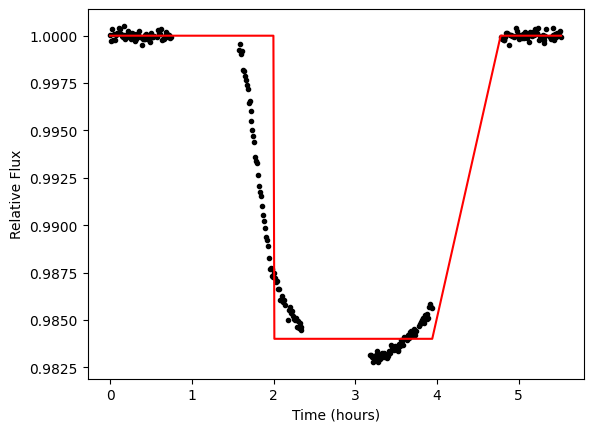

In [14]:
plt.plot(time, flux, linestyle = '', marker = '.', color = 'black')
plt.xlabel('Time (hours)')
plt.ylabel('Relative Flux')
plt.plot(time, box_model(time, 2, 3, 0.016), color = 'red')

In [28]:
# calculating the reduced chi-squared statistic

error = np.std(flux[1:25])

predictions = box_model(time, 2, 3, 0.016)

chi2 = np.sum((flux - predictions)**2 / error)
chi2 / (len(time) - 3)

# this is low, maybe because I'm overestimating the error

0.046628435737406125

In [ ]:
# max_time = np.max(time)

# with pm.Model() as model:
#   tau = pm.Triangular("tau", lower = 0, upper = max_time, c = max_time) # duration of blockage
#   t_0 = pm.Triangular("t_0", lower = 0, upper = max_time, c = max_time / 2) # midpoint of blockage
#   delta = pm.LogNormal("delta", )
